In [39]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import geopandas as gpd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib.colors import LinearSegmentedColormap

import statsmodels.api as sml

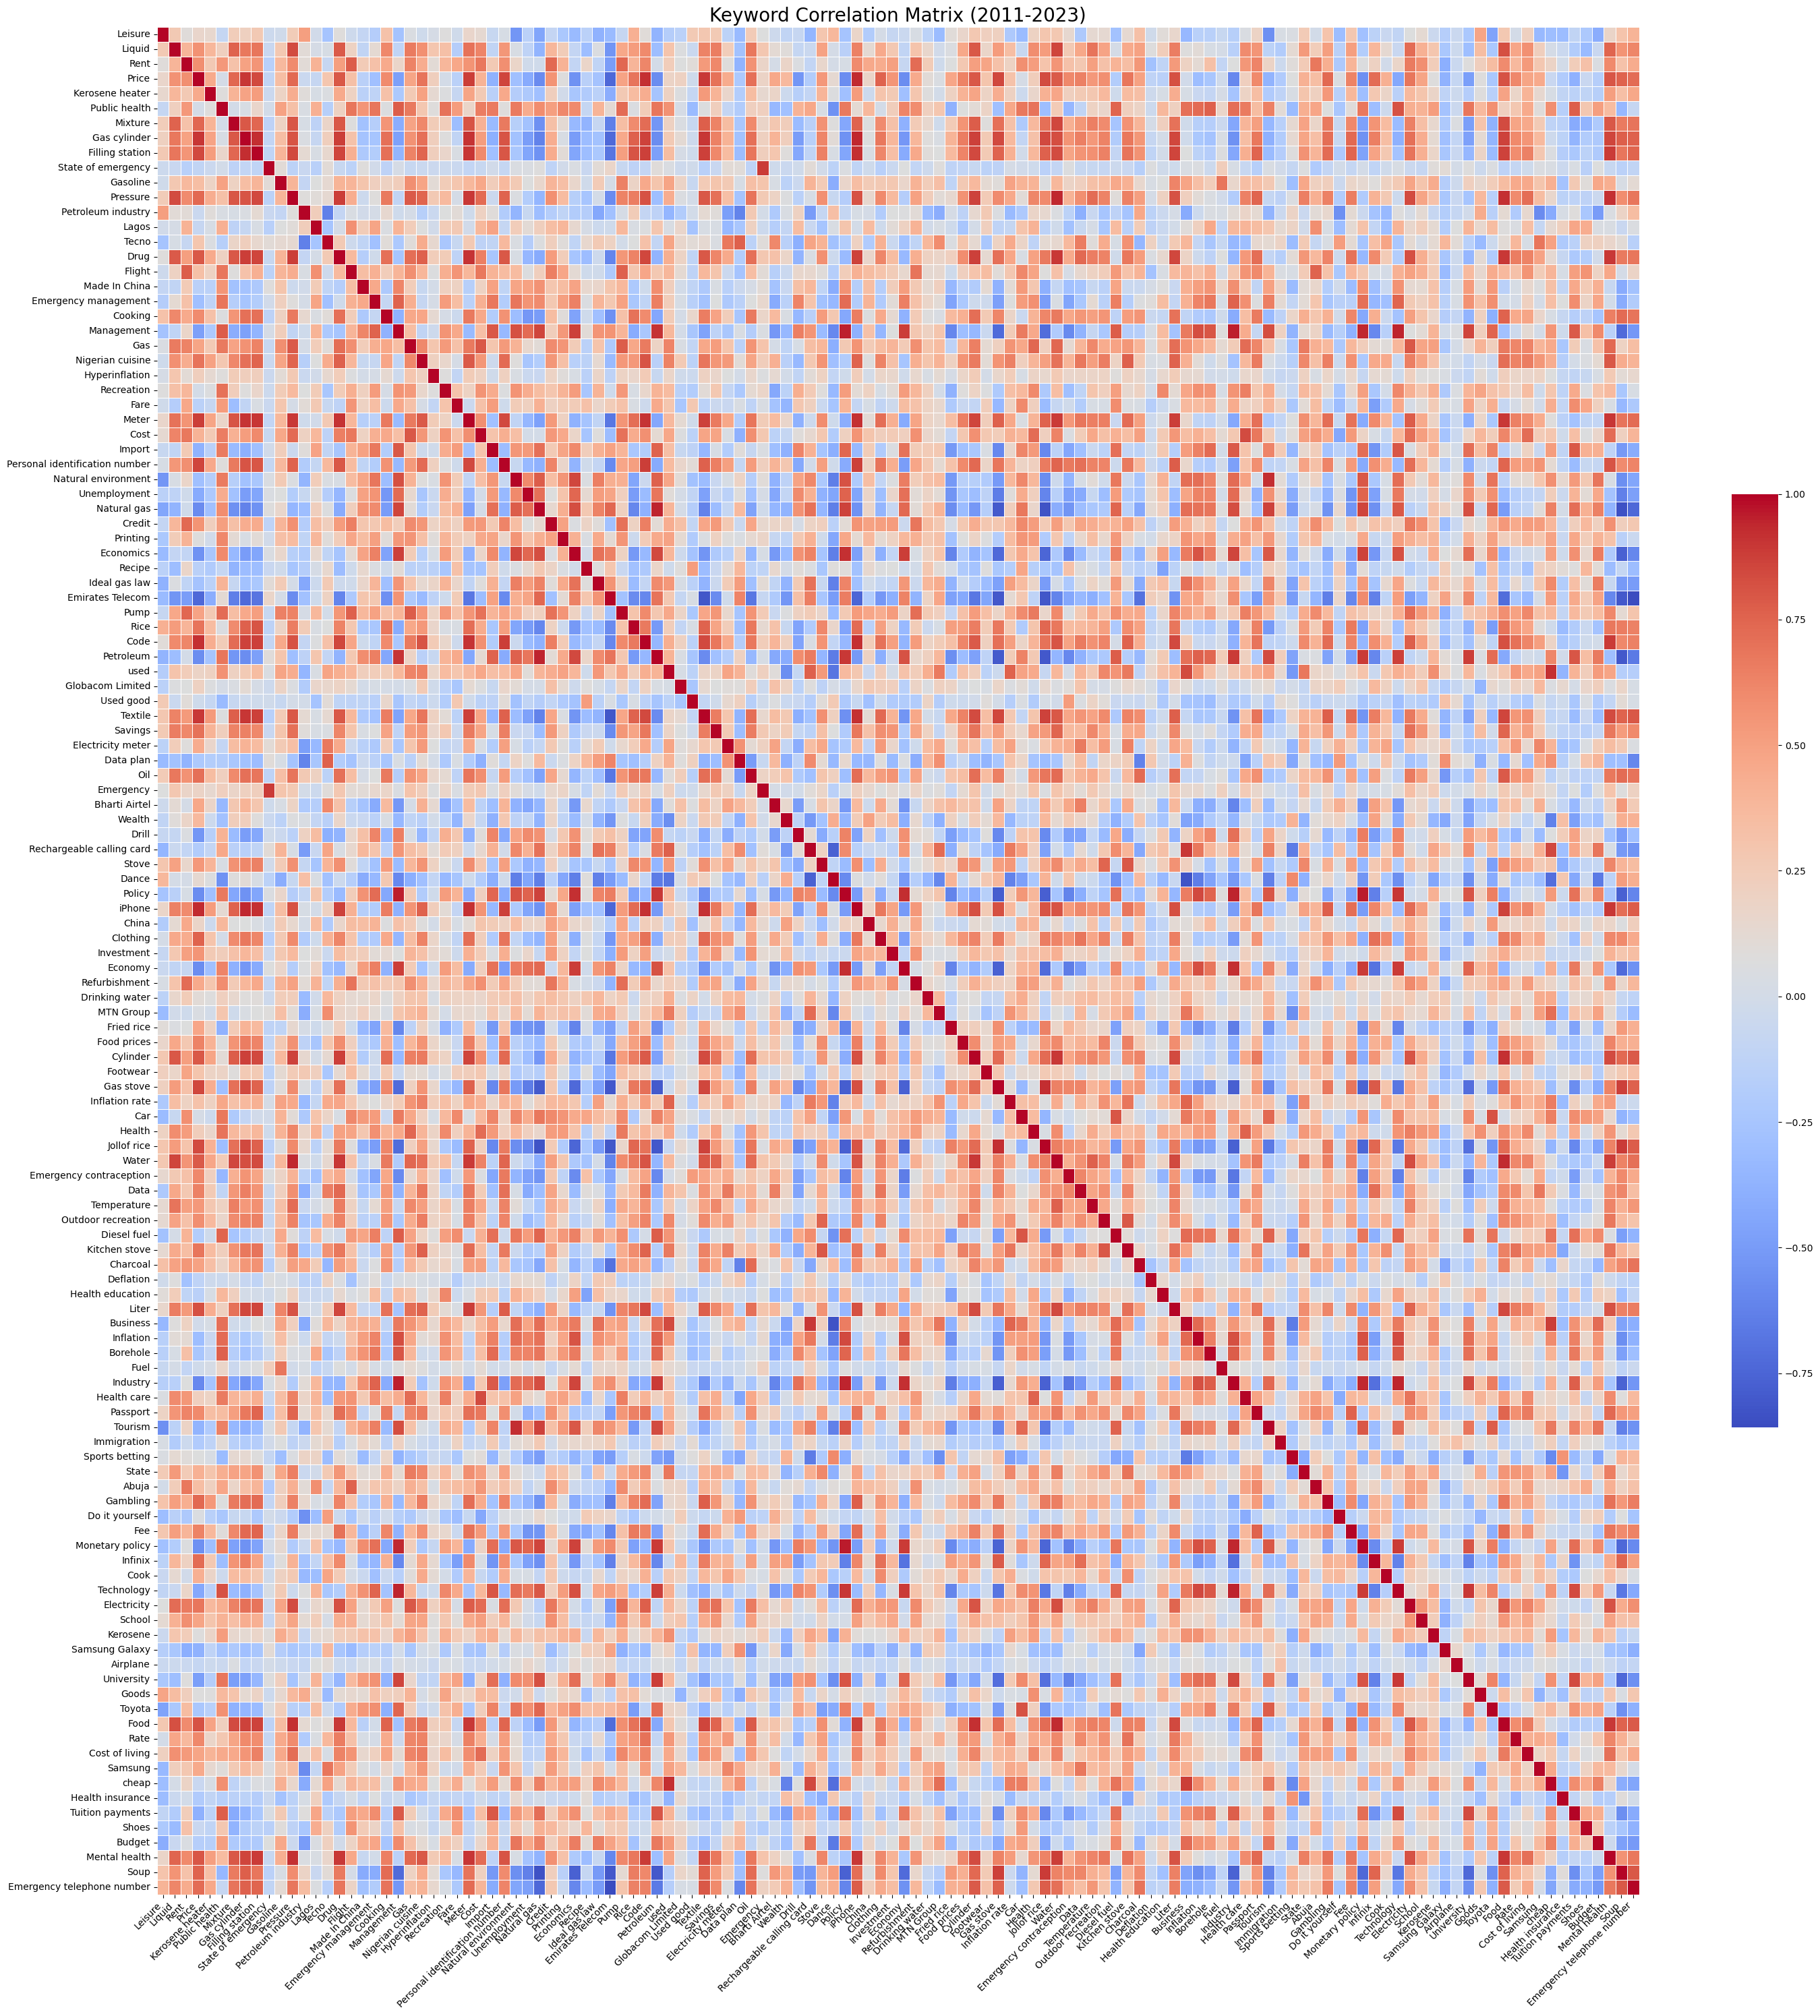

In [5]:
# Keyword Correlation Matrix

# Get trends data 2011-2023 from the 2011-2024 csv file

trends = pd.read_csv('combined_trends_data_2011_2024.csv')

# select only keywords
trends_keywords = trends.iloc[:, 1:]

# select only rows with 'Month' between 2011-01 and 2023-12
trends_keywords_2011_2023 = trends_keywords[(trends['Month'] >= '2011-01') & (trends['Month'] <= '2023-12')]

# display dataframe
trends_keywords_2011_2023.head()

# Get the correlation matrix
corr = trends_keywords_2011_2023.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 30))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Keyword Correlation Matrix (2011-2023)', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('keyword_correlation_matrix_2011_2023.png', dpi=300)
plt.show()



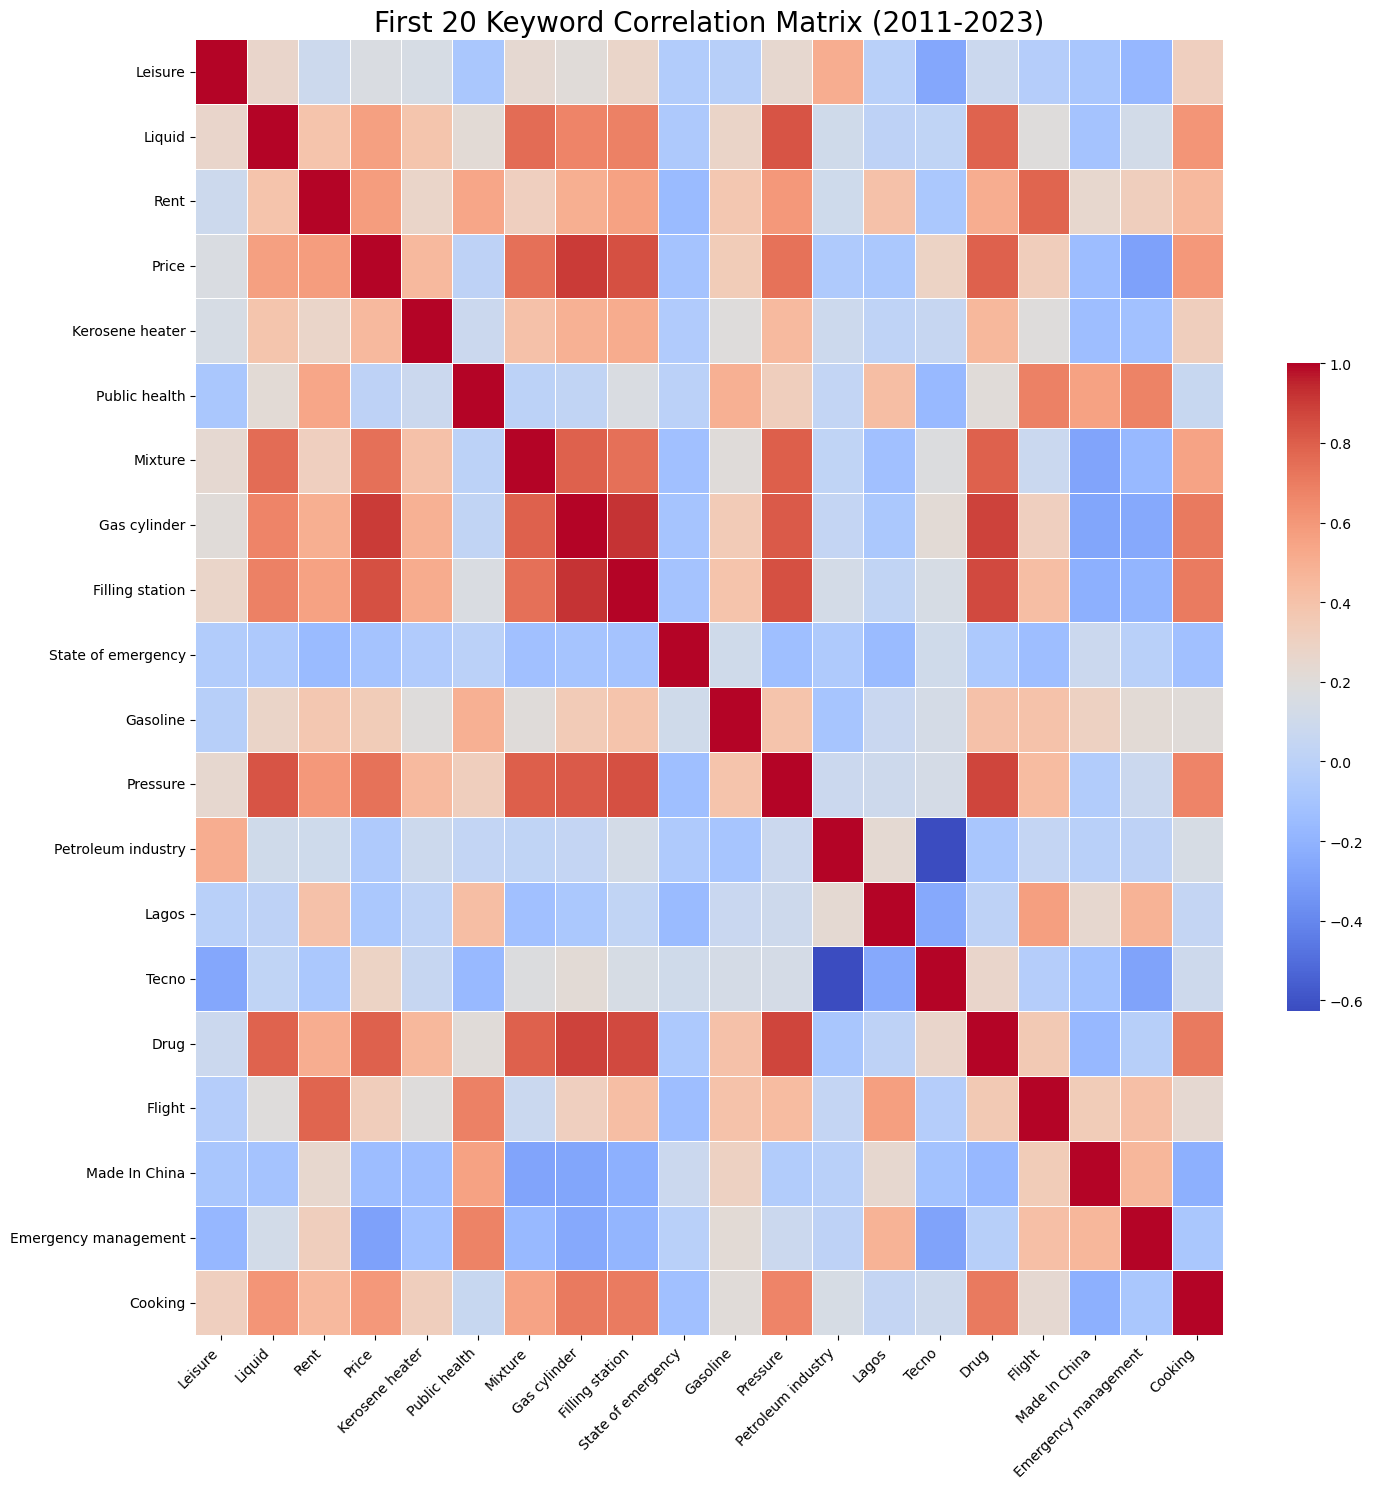

In [6]:
# Get correlation matrix for just the first 20 keywords
trends_keywords_2011_2023_20 = trends_keywords_2011_2023.iloc[:, :20]

# Get the correlation matrix
corr_20 = trends_keywords_2011_2023_20.corr()

# Set up the matplotlib figure
# Set up the matplotlib figure
plt.figure(figsize=(15, 15))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_20, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('First 20 Keyword Correlation Matrix (2011-2023)', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('keyword_correlation_matrix_2011_2023.png', dpi=300)
plt.show()

In [7]:
# keywords with month column
keywords = pd.read_csv('combined_trends_data_2011_2024.csv')
keywords_till_2023 = keywords[(keywords['Month'] >= '2011-01') & (keywords['Month'] <= '2023-12')]
keywords_till_2023.tail()

,Month,Leisure,Liquid,Rent,Price,Kerosene heater,Public health,Mixture,Gas cylinder,Filling station,...,Cost of living,Samsung,cheap,Health insurance,Tuition payments,Shoes,Budget,Mental health,Soup,Emergency telephone number
151,2023-08,31,83,84,86,33,51,64,77,95,...,73,88,74,13,28,64,23.0,67,76,41
152,2023-09,35,76,84,84,0,50,65,83,84,...,67,87,73,10,28,64,27.0,69,68,46
153,2023-10,36,76,84,90,46,54,94,69,85,...,75,87,70,11,26,65,25.0,100,73,46
154,2023-11,32,81,85,88,34,52,84,67,82,...,67,86,68,12,26,72,29.0,76,71,61
155,2023-12,27,74,78,97,0,45,62,63,84,...,56,98,60,10,24,77,31.0,58,68,47


In [8]:
# get CPI and inflation % data 

ground_truth_aggregate_ratios = pd.read_csv('composite_aggregate_ratios.csv')
# ground_truth_aggregate_ratios.head()
yoy_inflation = ground_truth_aggregate_ratios[['Month', 'Year-on-Year Change (%)']]
yoy_inflation_till_2023 = yoy_inflation[(yoy_inflation['Month'] >= '2011-01') & (yoy_inflation['Month'] <= '2023-12')]
yoy_inflation_till_2023.tail()


,Month,Year-on-Year Change (%)
320,2023-08,25.797840
321,2023-09,26.715832
322,2023-10,27.329722
323,2023-11,28.200174
324,2023-12,28.921790


In [9]:
ground_truth_aggregate = pd.read_csv('composite_aggregate.csv')
# ground_truth_aggregate.head()
cpi_data = ground_truth_aggregate[['Month', 'All Items']]
cpi_data_till_2023 = cpi_data[(cpi_data['Month'] >= '2011-01') & (cpi_data['Month'] <= '2023-12')]
cpi_data_till_2023.tail()

,Month,All Items
320,2023-08,593.551905
321,2023-09,606.001800
322,2023-10,616.512817
323,2023-11,629.385288
324,2023-12,643.781248


In [10]:
# create dataframe with keywords and cpi data
trends_keywords_2011_2023_cpi = keywords_till_2023.copy()

# merge with cpi data
trends_keywords_2011_2023_cpi = pd.merge(trends_keywords_2011_2023_cpi, cpi_data_till_2023, on='Month', how='inner')

trends_keywords_2011_2023_cpi.tail()

,Month,Leisure,Liquid,Rent,Price,Kerosene heater,Public health,Mixture,Gas cylinder,Filling station,...,Samsung,cheap,Health insurance,Tuition payments,Shoes,Budget,Mental health,Soup,Emergency telephone number,All Items
151,2023-08,31,83,84,86,33,51,64,77,95,...,88,74,13,28,64,23.0,67,76,41,593.551905
152,2023-09,35,76,84,84,0,50,65,83,84,...,87,73,10,28,64,27.0,69,68,46,606.001800
153,2023-10,36,76,84,90,46,54,94,69,85,...,87,70,11,26,65,25.0,100,73,46,616.512817
154,2023-11,32,81,85,88,34,52,84,67,82,...,86,68,12,26,72,29.0,76,71,61,629.385288
155,2023-12,27,74,78,97,0,45,62,63,84,...,98,60,10,24,77,31.0,58,68,47,643.781248


In [11]:
# repeat for yoy inflation
# create dataframe with keywords and cpi data
trends_keywords_2011_2023_yoy_inflation = keywords_till_2023.copy()

# merge with inflation data
trends_keywords_2011_2023_inflation = pd.merge(trends_keywords_2011_2023_yoy_inflation, yoy_inflation_till_2023, on='Month', how='inner')

trends_keywords_2011_2023_inflation.tail()

,Month,Leisure,Liquid,Rent,Price,Kerosene heater,Public health,Mixture,Gas cylinder,Filling station,...,Samsung,cheap,Health insurance,Tuition payments,Shoes,Budget,Mental health,Soup,Emergency telephone number,Year-on-Year Change (%)
151,2023-08,31,83,84,86,33,51,64,77,95,...,88,74,13,28,64,23.0,67,76,41,25.797840
152,2023-09,35,76,84,84,0,50,65,83,84,...,87,73,10,28,64,27.0,69,68,46,26.715832
153,2023-10,36,76,84,90,46,54,94,69,85,...,87,70,11,26,65,25.0,100,73,46,27.329722
154,2023-11,32,81,85,88,34,52,84,67,82,...,86,68,12,26,72,29.0,76,71,61,28.200174
155,2023-12,27,74,78,97,0,45,62,63,84,...,98,60,10,24,77,31.0,58,68,47,28.921790


In [12]:
# Each Keyword Correlation with CPI 

# Get the correlation coefficient for each keyword with CPI
cpi_corr = trends_keywords_2011_2023_cpi.iloc[:, 1:].corr()['All Items'].drop('All Items').sort_values(ascending=False)
# Display the correlation coefficients
cpi_corr_df = pd.DataFrame(cpi_corr)
cpi_corr_df.reset_index(inplace=True)
cpi_corr_df.columns = ['Keyword', 'Correlation with CPI']
cpi_corr_df.tail(50)

,Keyword,Correlation with CPI
76,China,0.052845
77,Kerosene,0.035057
78,Printing,0.009557
79,Public health,0.004491
80,Drinking water,0.000468
81,Fuel,-0.016053
82,Used good,-0.032185
83,MTN Group,-0.035688
84,Health education,-0.043394
85,Lagos,-0.044384


In [13]:
# Each Keyword Correlation with Y-on-Y inflation %

# Get the correlation coefficient for each keyword with CPI
inflation_corr = trends_keywords_2011_2023_inflation.iloc[:, 1:].corr()['Year-on-Year Change (%)'].drop('Year-on-Year Change (%)').sort_values(ascending=False)
# Display the correlation coefficients
inflation_corr_df = pd.DataFrame(inflation_corr)
inflation_corr_df.reset_index(inplace=True)
inflation_corr_df.columns = ['Keyword', 'Correlation with Y-on-Y Inflation %']
inflation_corr_df.tail(50)

,Keyword,Correlation with Y-on-Y Inflation %
76,Business,0.007664
77,Samsung,0.003841
78,Sports betting,0.001956
79,Printing,-0.001925
80,Fare,-0.006378
81,MTN Group,-0.029670
82,Tecno,-0.033648
83,Lagos,-0.045099
84,China,-0.046160
85,Inflation,-0.055742


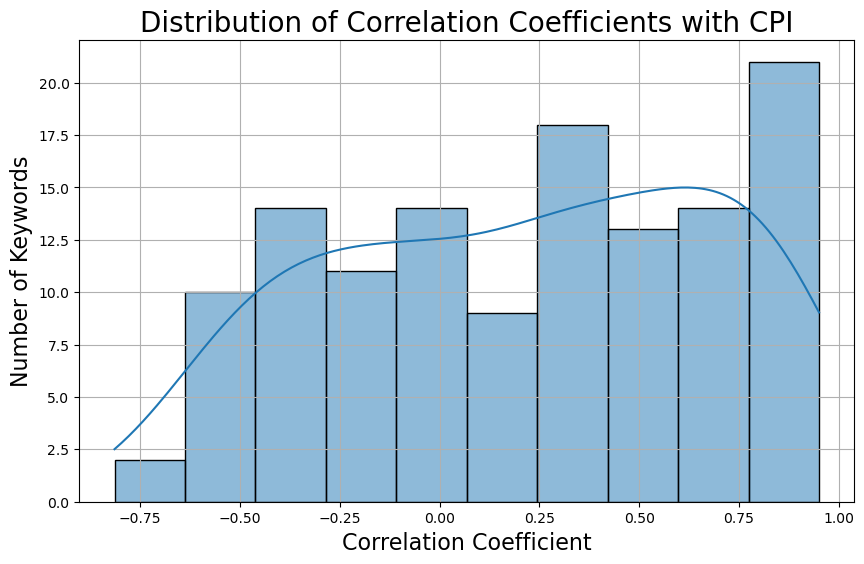

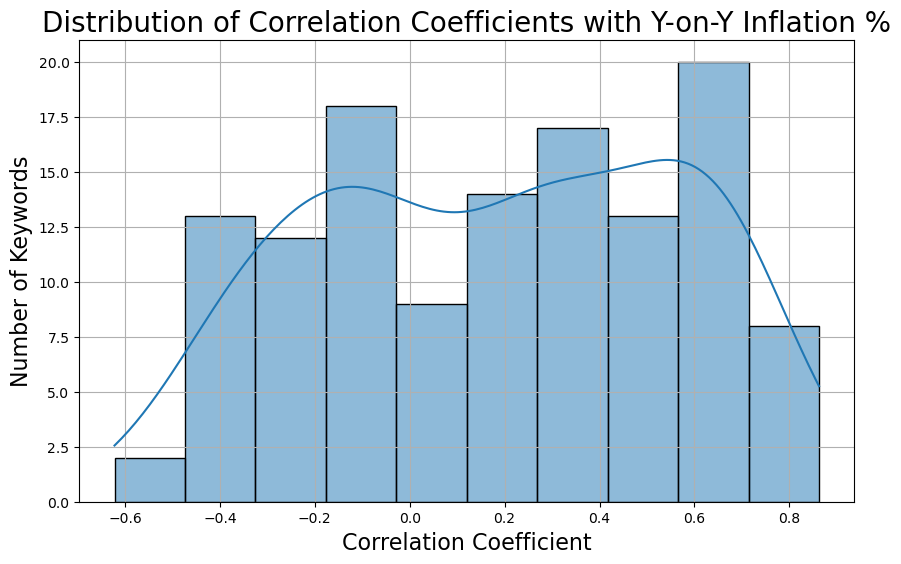

In [14]:
# plot histogram of correlation coefficients with CPI using seaborn

plt.figure(figsize=(10, 6))
sns.histplot(cpi_corr_df['Correlation with CPI'], bins=10, kde=True)
plt.title('Distribution of Correlation Coefficients with CPI', fontsize=20)
plt.xlabel('Correlation Coefficient', fontsize=16)
plt.ylabel('Number of Keywords', fontsize=16)
plt.grid()
plt.savefig('cpi_correlation_histogram.png', dpi=300)
plt.show()

# plot histogram of correlation coefficients with Y-on-Y inflation % using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(inflation_corr_df['Correlation with Y-on-Y Inflation %'], bins=10, kde=True)
plt.title('Distribution of Correlation Coefficients with Y-on-Y Inflation %', fontsize=20)
plt.xlabel('Correlation Coefficient', fontsize=16)
plt.ylabel('Number of Keywords', fontsize=16)
plt.grid()
plt.savefig('inflation_correlation_histogram.png', dpi=300)
plt.show()

In [15]:
# For values in last column of cpi_corr_df and inflation_corr_df, take the current value and all the values before it in that column and get the average using pd.apply() and lambda
cpi_corr_df['Average Correlation with CPI'] = cpi_corr_df['Correlation with CPI'].expanding().mean()
cpi_corr_df['Average Correlation with CPI'] = cpi_corr_df['Average Correlation with CPI'].round(4)

cpi_corr_df.head()
cpi_corr_df.tail()

,Keyword,Correlation with CPI,Average Correlation with CPI
121,Monetary policy,-0.590391,0.2421
122,Policy,-0.595765,0.2353
123,Petroleum,-0.628913,0.2283
124,Natural gas,-0.686540,0.2210
125,Emirates Telecom,-0.813711,0.2128


In [16]:
inflation_corr_df['Average Correlation with Y-on-Y Inflation %'] = inflation_corr_df['Correlation with Y-on-Y Inflation %'].expanding().mean()
inflation_corr_df['Average Correlation with Y-on-Y Inflation %'] = inflation_corr_df['Average Correlation with Y-on-Y Inflation %'].round(2)

inflation_corr_df.head()
# inflation_corr_df.tail()

,Keyword,Correlation with Y-on-Y Inflation %,Average Correlation with Y-on-Y Inflation %
0,Rice,0.862617,0.86
1,Filling station,0.796865,0.83
2,Gas cylinder,0.764408,0.81
3,Textile,0.743329,0.79
4,iPhone,0.739046,0.78


In [17]:
# # plot the average correlation with CPI
# plt.figure(figsize=(15, 10))
# plt.plot(cpi_corr_df['Keyword'], cpi_corr_df['Average Correlation with CPI'], marker='o', linestyle='-', color='b')
# plt.title('Average Correlation with CPI (2011-2023)', fontsize=20)
# plt.xlabel('Keyword', fontsize=15)
# plt.ylabel('Average Correlation with CPI', fontsize=15)
# plt.xticks(rotation=90)
# plt.grid()
# plt.tight_layout()
# plt.savefig('average_correlation_with_cpi_2011_2023.png', dpi=300)
# plt.show()

# # plot the average correlation with Y-on-Y inflation %
# plt.figure(figsize=(15, 10))        
# plt.plot(inflation_corr_df['Keyword'], inflation_corr_df['Average Correlation with Y-on-Y Inflation %'], marker='o', linestyle='-', color='b')
# plt.title('Average Correlation with Y-on-Y Inflation % (2011-2023)', fontsize=20)
# plt.xlabel('Keyword', fontsize=15)
# plt.ylabel('Average Correlation with Y-on-Y Inflation %', fontsize=15)
# plt.xticks(rotation=90)
# plt.grid()
# plt.tight_layout()
# plt.savefig('average_correlation_with_yoy_inflation_2011_2023.png', dpi=300)
# plt.show()

In [18]:
# # plot both average correlation with CPI and Y-on-Y inflation % using index + 1 not keywords

# plt.figure(figsize=(15, 10))
# plt.plot(cpi_corr_df.index + 1, cpi_corr_df['Average Correlation with CPI'], marker='o', linestyle='-', color='b', label='CPI')
# plt.plot(inflation_corr_df.index + 1, inflation_corr_df['Average Correlation with Y-on-Y Inflation %'], marker='o', linestyle='-', color='r', label='Y-on-Y Inflation %')
# plt.title('Average Correlation with CPI and Y-on-Y Inflation % (2011-2023)', fontsize=20)
# plt.xlabel('Number of Queries (Ordered in Decreasing Correlation Values)', fontsize=15)
# plt.ylabel('Average Correlation', fontsize=15)
# plt.legend()
# plt.tight_layout()
# plt.savefig('average_correlation_with_cpi_and_yoy_inflation_2011_2023.png', dpi=300)
# plt.show()

In [19]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Add a column to keep track of x-values (index + 1)
# cpi_corr_df = cpi_corr_df.copy()
# cpi_corr_df['Query Rank'] = cpi_corr_df.index + 1
# inflation_corr_df = inflation_corr_df.copy()
# inflation_corr_df['Query Rank'] = inflation_corr_df.index + 1

# # Prepare the figure
# plt.figure(figsize=(15, 10))

# # Plot using seaborn
# sns.lineplot(data=cpi_corr_df, x='Query Rank', y='Average Correlation with CPI', marker='o', label='CPI', color='b')
# sns.lineplot(data=inflation_corr_df, x='Query Rank', y='Average Correlation with Y-on-Y Inflation %', marker='o', label='Y-on-Y Inflation %', color='r')

# # Titles and labels
# plt.title('Average Correlation with CPI and Y-on-Y Inflation % (2011-2023)', fontsize=20)
# plt.xlabel('Number of Queries (Ordered in Decreasing Correlation Values)', fontsize=15)
# plt.ylabel('Average Correlation', fontsize=15)

# # Legend and layout
# plt.legend()
# plt.tight_layout()

# # Save and show
# plt.savefig('average_correlation_with_cpi_and_yoy_inflation_2011_2023.png', dpi=300)
# plt.show()


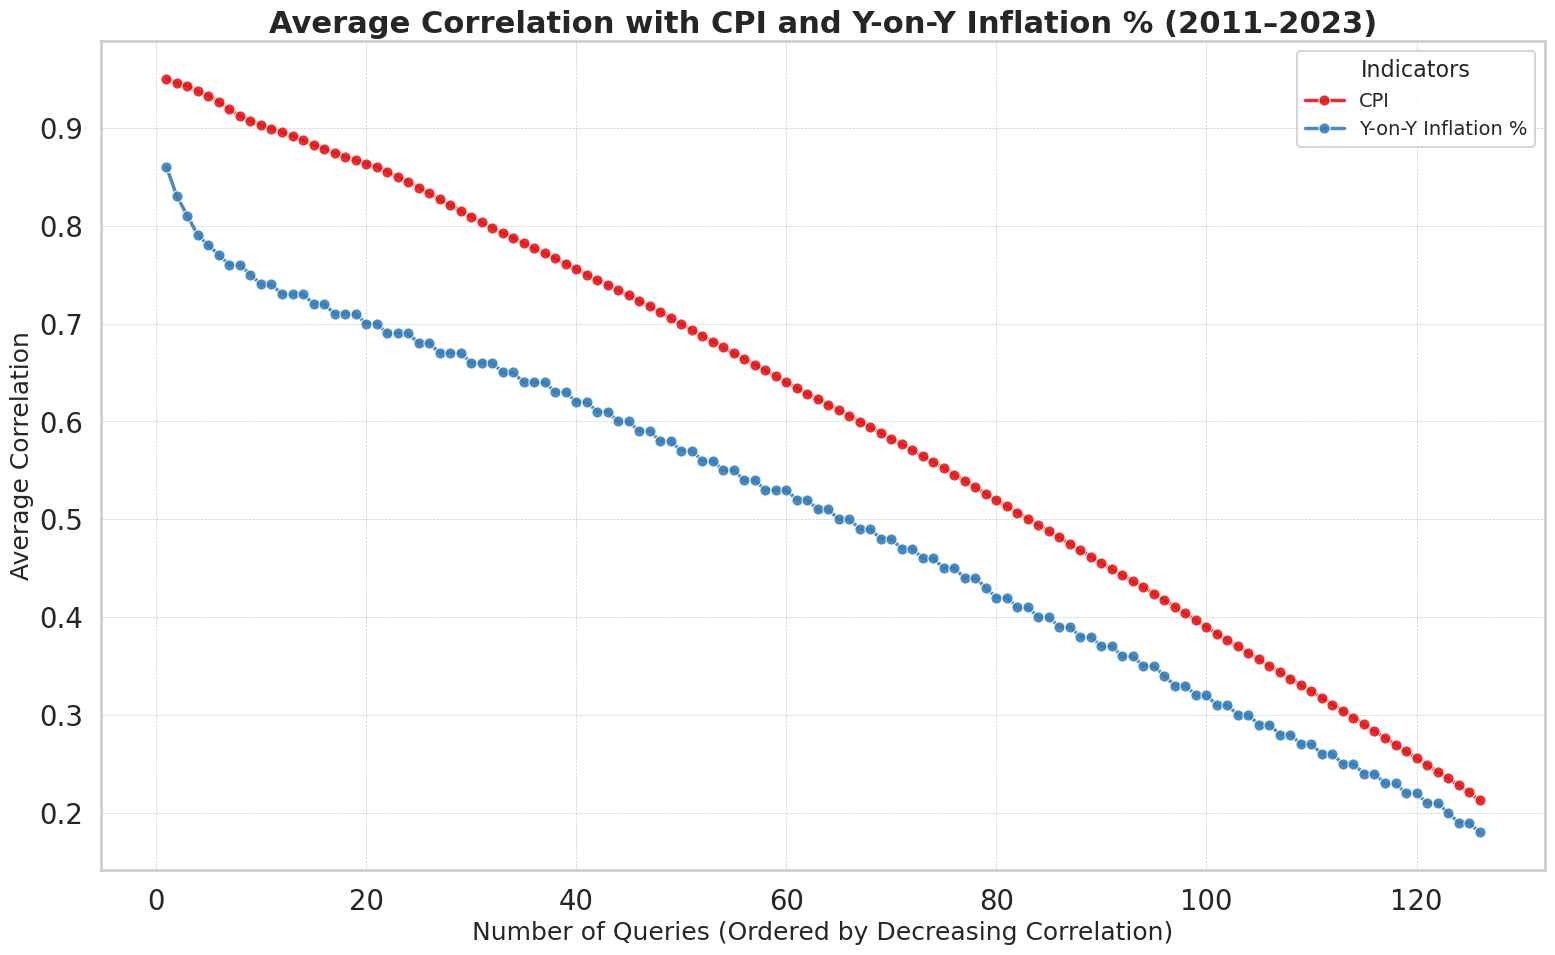

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)

# Add 'Query Rank' for x-axis
cpi_corr_df = cpi_corr_df.copy()
cpi_corr_df['Query Rank'] = cpi_corr_df.index + 1
inflation_corr_df = inflation_corr_df.copy()
inflation_corr_df['Query Rank'] = inflation_corr_df.index + 1

# Create figure
plt.figure(figsize=(16, 10))

# Custom color palette
palette = sns.color_palette("Set1")

# Plot lines
sns.lineplot(
    data=cpi_corr_df,
    x='Query Rank',
    y='Average Correlation with CPI',
    label='CPI',
    marker='o',
    markersize=8,
    linewidth=2.5,
    alpha=0.9,
    color=palette[0]
)

sns.lineplot(
    data=inflation_corr_df,
    x='Query Rank',
    y='Average Correlation with Y-on-Y Inflation %',
    label='Y-on-Y Inflation %',
    marker='o',
    markersize=8,
    linewidth=2.5,
    alpha=0.9,
    color=palette[1]
)

# Title and axis labels
plt.title('Average Correlation with CPI and Y-on-Y Inflation % (2011–2023)', fontsize=22, weight='bold')
plt.xlabel('Number of Queries (Ordered by Decreasing Correlation)', fontsize=18)
plt.ylabel('Average Correlation', fontsize=18)

# Tweak legend
plt.legend(title='Indicators', fontsize=14, title_fontsize=16, loc='best', frameon=True)

# Grid and layout tweaks
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save and show
plt.savefig('average_correlation_beautified.png', dpi=300, bbox_inches='tight')
plt.show()


In [21]:
# Count of consecutive zeros in each keyword's timeseries data

# Create a function to count consecutive zeros
def count_consecutive_zeros(series):
    count = 0
    max_count = 0
    for value in series:
        if value == 0:
            count += 1
        else:
            max_count = max(max_count, count)
            count = 0
    return max(max_count, count)

# Apply the function to each keyword column
consecutive_zeros_count = trends_keywords_2011_2023.iloc[:, 1:].apply(count_consecutive_zeros)

# Create a DataFrame to store the results
consecutive_zeros_df = pd.DataFrame(consecutive_zeros_count)
consecutive_zeros_df.reset_index(inplace=True)
consecutive_zeros_df.columns = ['Keyword', 'Consecutive Zeros Count']
consecutive_zeros_df = consecutive_zeros_df.sort_values(by='Consecutive Zeros Count', ascending=False)
consecutive_zeros_df.reset_index(drop=True, inplace=True)
# filter out keywords with 0 consecutive zeros
consecutive_zeros_df = consecutive_zeros_df[consecutive_zeros_df['Consecutive Zeros Count'] > 0]
consecutive_zeros_df.head(50)

,Keyword,Consecutive Zeros Count
0,Kerosene heater,81
1,Emergency telephone number,70
2,used,54
3,Outdoor recreation,54
4,cheap,54
5,Business,44
6,Electricity meter,38
7,Rechargeable calling card,35
8,Hyperinflation,31
9,Data plan,31


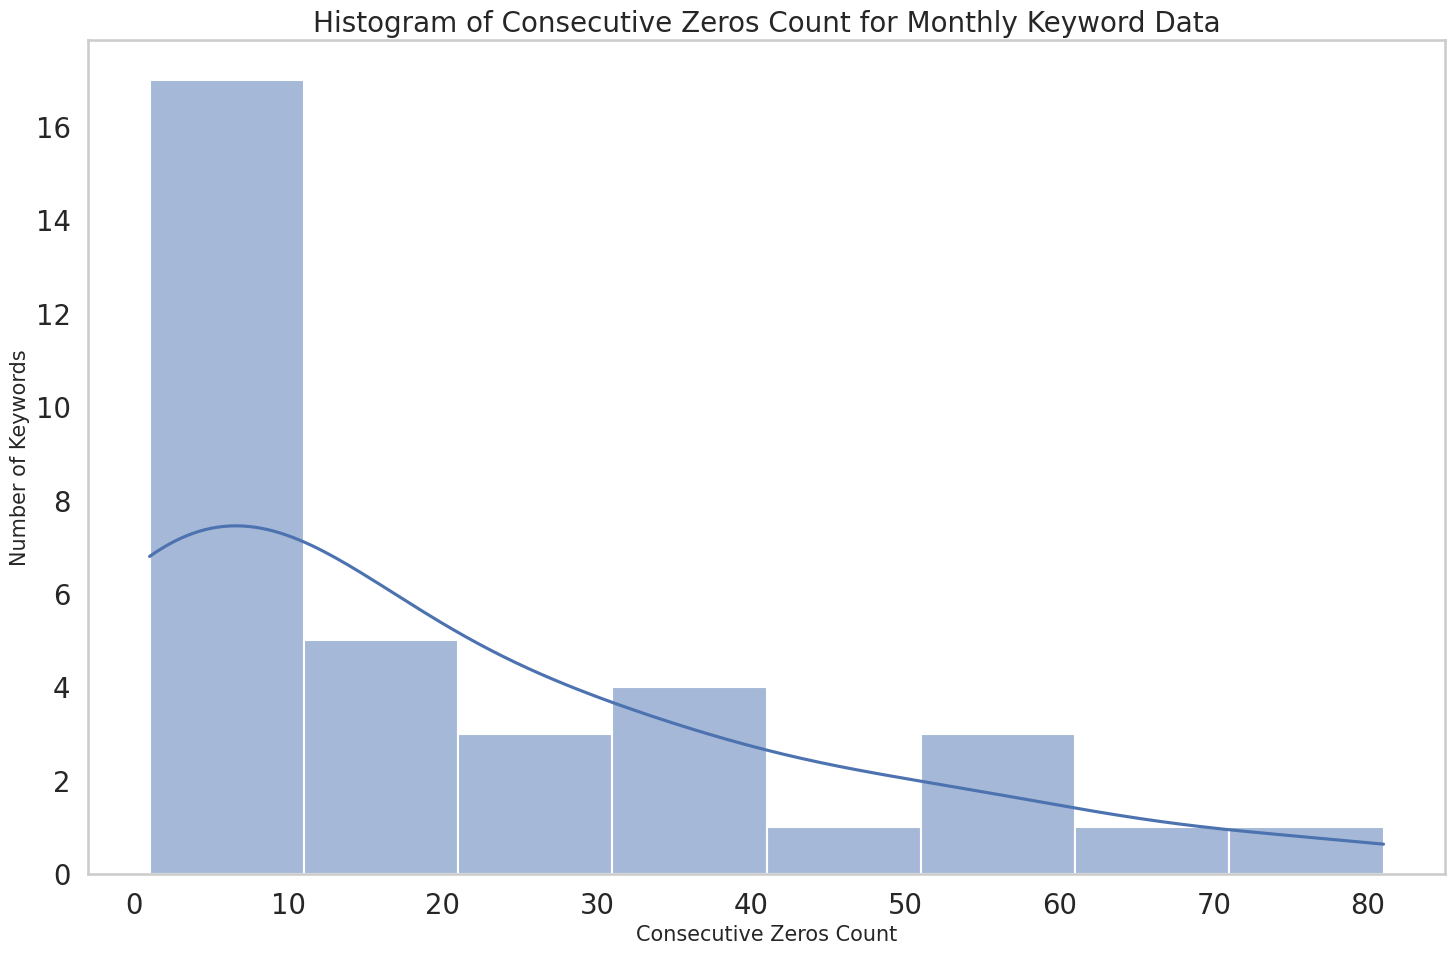

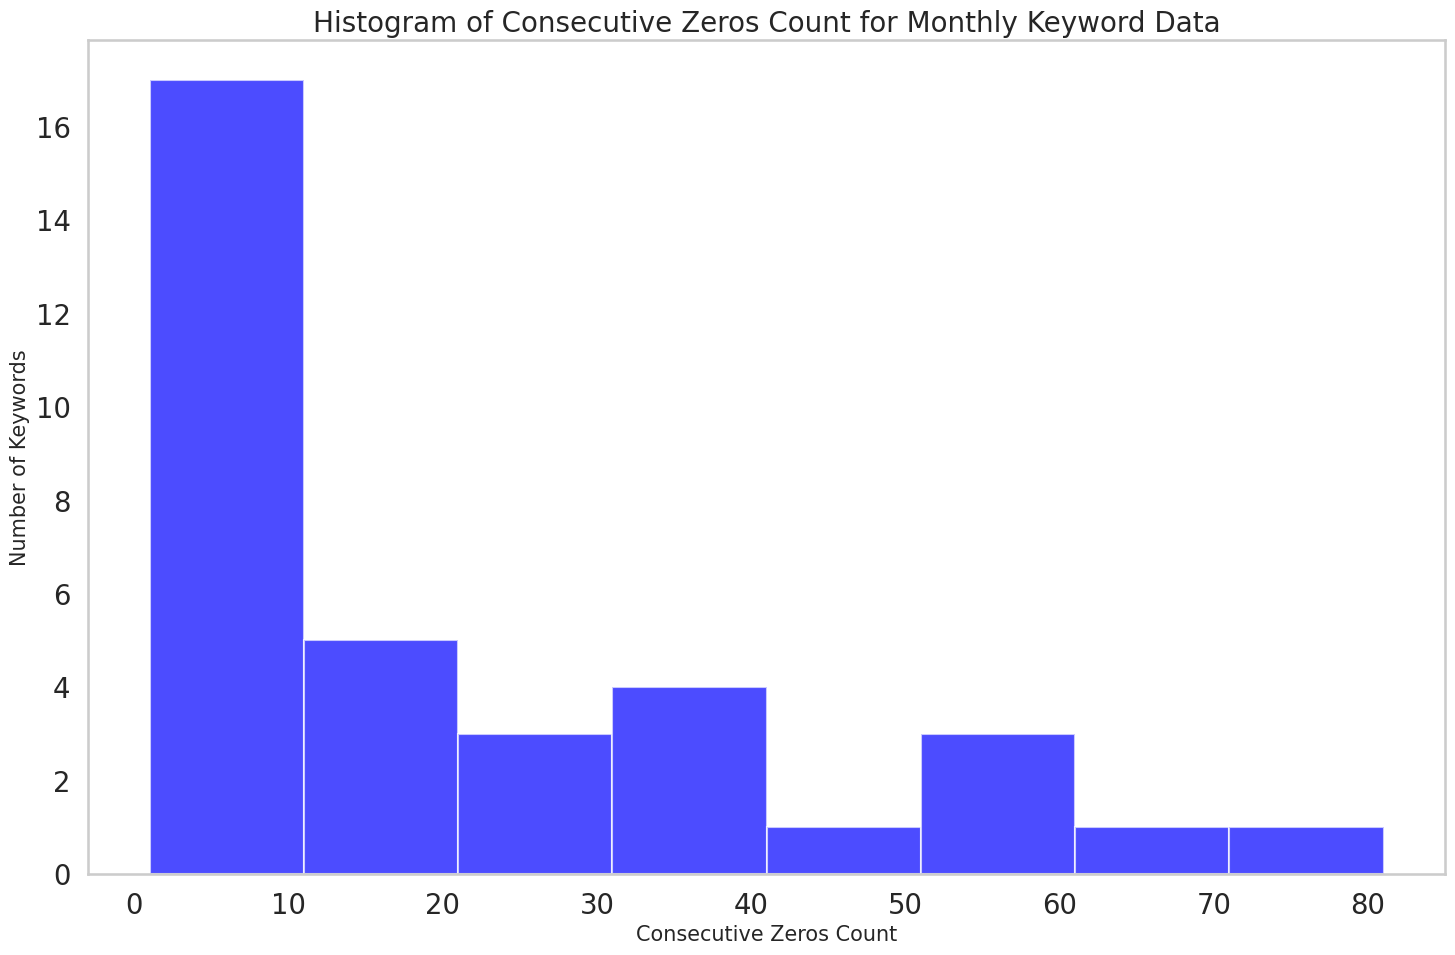

In [22]:
# Plot historogram of consecutive zeros count using seaborn
plt.figure(figsize=(15, 10))
sns.histplot(data=consecutive_zeros_df, x='Consecutive Zeros Count', bins=8, kde=True)
plt.title('Histogram of Consecutive Zeros Count for Monthly Keyword Data', fontsize=20)
plt.xlabel('Consecutive Zeros Count', fontsize=15)
plt.ylabel('Number of Keywords', fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('consecutive_zeros_histogram.png', dpi=300)
plt.show()

# Plot histogram of consecutive zeros count using matplotlib
plt.figure(figsize=(15, 10))
plt.hist(consecutive_zeros_df['Consecutive Zeros Count'], bins=8, color='blue', alpha=0.7)
plt.title('Histogram of Consecutive Zeros Count for Monthly Keyword Data', fontsize=20)
plt.xlabel('Consecutive Zeros Count', fontsize=15)
plt.ylabel('Number of Keywords', fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('consecutive_zeros_histogram_matplotlib.png', dpi=300)
plt.show()

In [23]:
# Map of average normalized geoMap representation for each state
# Add missing states and zero if necessary

# load combined geo trends data
geo_trends = pd.read_csv('combined_trends_data_geo.csv')
geo_trends = geo_trends.fillna(0)
# change Ogun State to Ogun
geo_trends['Region'] = geo_trends['Region'].replace({'Ogun State': 'Ogun'})

# get average normalized value for each state
geo_trends['Median Normalized Search Count'] = geo_trends.iloc[:, 1:].median(axis=1)
geo_trends['Mean Normalized Search Count'] = geo_trends.iloc[:, 1:].mean(axis=1)
# drop the keyword columns
geo_trends = geo_trends.iloc[:, [0, -2, -1]]
display(geo_trends)

,Region,Median Normalized Search Count,Mean Normalized Search Count
0,Delta,64.0,60.464567
1,Osun,71.0,68.629921
2,Ogun,75.0,72.000000
3,Imo,65.5,64.736220
4,Ekiti,68.5,66.003937
5,Abia,66.5,64.287402
6,Anambra,64.5,61.271654
7,Niger,67.0,64.598425
8,Edo,57.0,56.755906
9,Oyo,73.0,69.708661


In [24]:
# load map data for Nigeria with default CRS
ng_json = gpd.read_file('ng.json')
ng_json.set_crs(epsg=4326, inplace=True)
# rename the column 'name' to 'Region'
ng_json = ng_json.rename(columns={'name': 'Region'})
# change Nassarawa to Nasarawa
ng_json['Region'] = ng_json['Region'].replace({'Nassarawa': 'Nasarawa'})
# display(ng_json)

# merge the two dataframes
merged_geo_trends = ng_json.merge(geo_trends, on='Region', how='right')
# drop the source and id columns
merged_geo_trends = merged_geo_trends.drop(columns=['source', 'id'])
# display the merged dataframe
display(merged_geo_trends)

,Region,geometry,Median Normalized Search Count,Mean Normalized Search Count
0,Delta,"POLYGON ((5.00302 5.85478, 5.00365 5.85621, 5....",64.0,60.464567
1,Osun,"POLYGON ((4.55562 8.03411, 4.62001 8.03749, 4....",71.0,68.629921
2,Ogun,"POLYGON ((2.67169 7.89343, 2.67832 7.89732, 2....",75.0,72.000000
3,Imo,"POLYGON ((7.25148 5.1947, 7.22181 5.1863, 7.18...",65.5,64.736220
4,Ekiti,"POLYGON ((5.06412 8.03057, 5.07559 8.02357, 5....",68.5,66.003937
5,Abia,"POLYGON ((7.87779 5.69027, 7.89433 5.64464, 7....",66.5,64.287402
6,Anambra,"POLYGON ((6.60573 5.72317, 6.60945 5.7658, 6.6...",64.5,61.271654
7,Niger,"POLYGON ((3.70558 11.12073, 3.70564 11.12079, ...",67.0,64.598425
8,Edo,"POLYGON ((5.11517 6.12691, 5.11558 6.15825, 5....",57.0,56.755906
9,Oyo,"POLYGON ((2.74244 8.52748, 2.74963 8.53302, 2....",73.0,69.708661


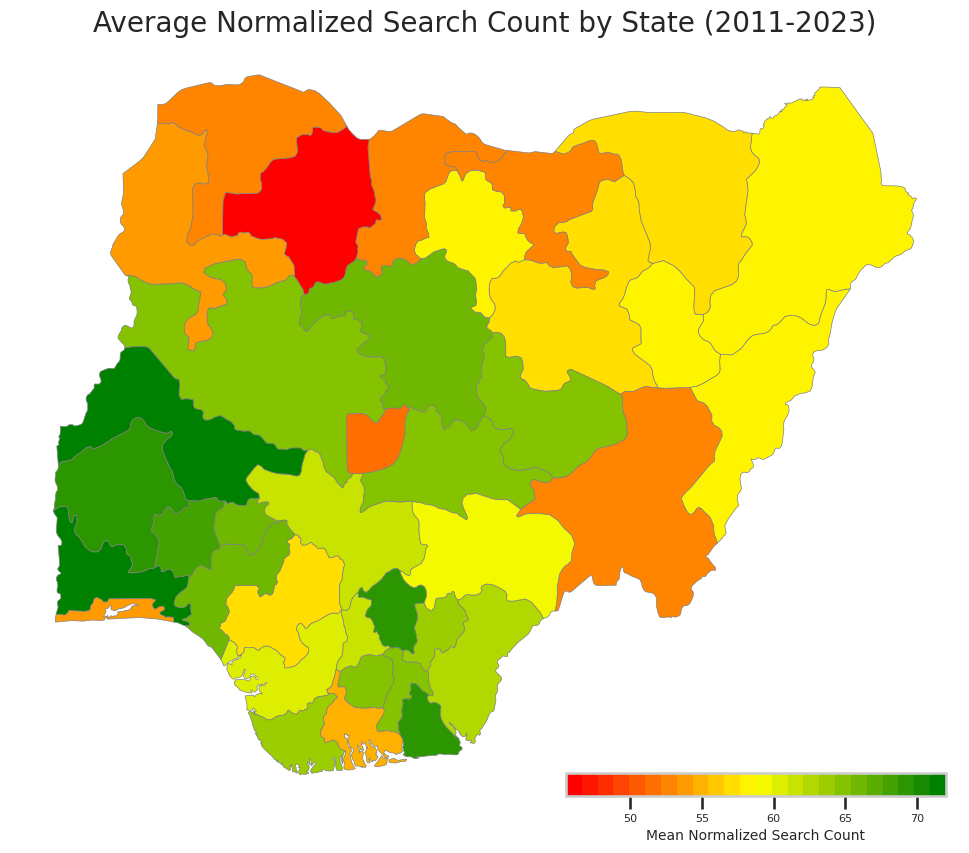

In [25]:
# cmap = 'Spectral'

cmap = LinearSegmentedColormap.from_list(
    'custom_cmap',
    # ['#f7fbff', '#deebf7', '#9ecae1', '#3182bd', '#08519c'],
    # ['#b30000', '#ffff00', '#006400'],
    ['red', 'yellow', 'green'],
    # N=256,
    N=24
)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the map with the average normalized search count
map_plot = merged_geo_trends.plot(
                                    column='Mean Normalized Search Count', 
                                    ax=ax,
                                    cmap=cmap,
                                    # edgecolor='black',
                                    edgecolor='grey',
                                    # edgecolor='white',
                                    linewidth=0.5,
                                    # legend=True,
                                    )

ax.set_axis_off()
ax.set_title('Average Normalized Search Count by State (2011-2023)', fontsize=20)

# create colorbars
axins = inset_axes(
                    ax, 
                    width = "40%",
                    height = "3%",
                    loc = "lower right",
                    # bbox_to_anchor=(0., 0.0, 1, 1),
                    # bbox_transform=ax.transAxes,
                    # borderpad=0,
                )

vmin=merged_geo_trends['Mean Normalized Search Count'].min()
vmax=merged_geo_trends['Mean Normalized Search Count'].max()
step= int((vmax - vmin) / 5)
ticks = [ i for i in range(int(vmin), int(vmax), step) ]

sm = plt.cm.ScalarMappable(
                            cmap=cmap, 
                            norm=plt.Normalize(vmin=vmin, vmax=vmax)
                            )

axins.xaxis.set_ticks_position('bottom')
cbar = fig.colorbar(sm, cax=axins, orientation="horizontal", ticks=ticks)
cbar.ax.tick_params(labelsize=8)
cbar.set_label("Mean Normalized Search Count", fontsize=10)


plt.show()

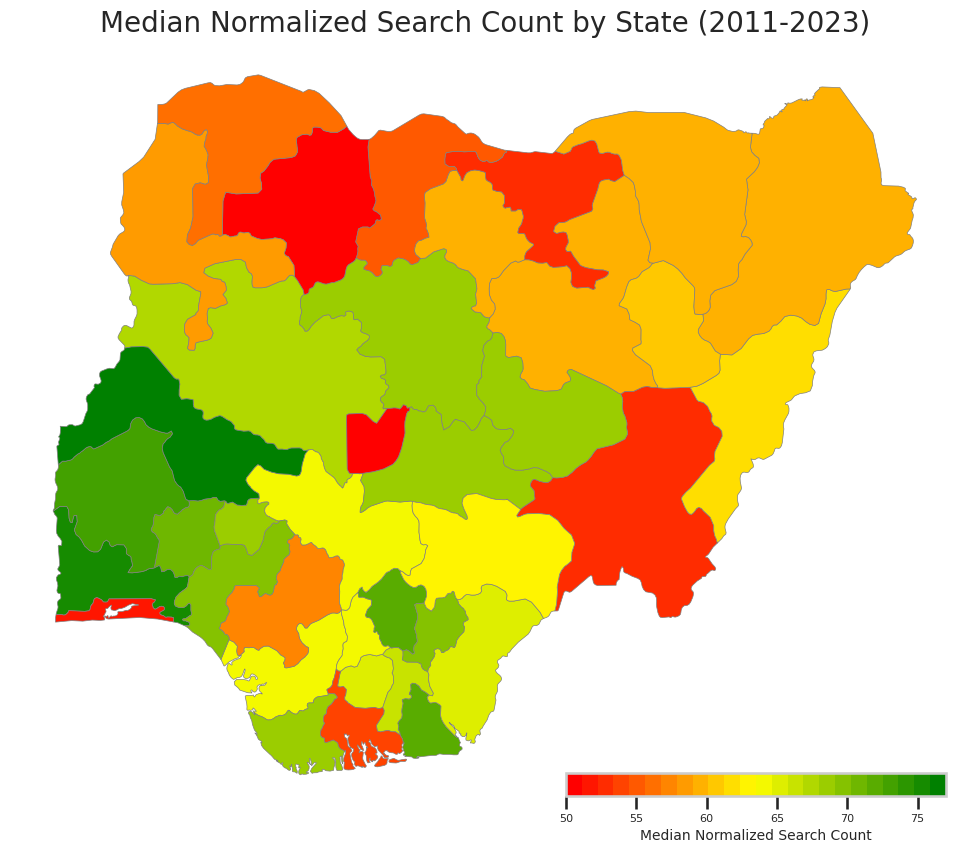

In [26]:
# cmap = 'Spectral'

cmap = LinearSegmentedColormap.from_list(
    'custom_cmap',
    # ['#f7fbff', '#deebf7', '#9ecae1', '#3182bd', '#08519c'],
    # ['#b30000', '#ffff00', '#006400'],
    ['red', 'yellow', 'green'],
    # N=256,
    N=24
)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the map with the average normalized search count
map_plot = merged_geo_trends.plot(
                                    column='Median Normalized Search Count', 
                                    ax=ax,
                                    cmap=cmap,
                                    # edgecolor='black',
                                    edgecolor='grey',
                                    # edgecolor='white',
                                    linewidth=0.5,
                                    # legend=True,
                                    )

ax.set_axis_off()
ax.set_title('Median Normalized Search Count by State (2011-2023)', fontsize=20)

# create colorbars
axins = inset_axes(
                    ax, 
                    width = "40%",
                    height = "3%",
                    loc = "lower right",
                    # bbox_to_anchor=(0., 0.0, 1, 1),
                    # bbox_transform=ax.transAxes,
                    # borderpad=0,
                )

vmin=merged_geo_trends['Median Normalized Search Count'].min()
vmax=merged_geo_trends['Median Normalized Search Count'].max()
step= int((vmax - vmin) / 5)
ticks = [ i for i in range(int(vmin), int(vmax), step) ]

sm = plt.cm.ScalarMappable(
                            cmap=cmap, 
                            norm=plt.Normalize(vmin=vmin, vmax=vmax)
                            )

axins.xaxis.set_ticks_position('bottom')
cbar = fig.colorbar(sm, cax=axins, orientation="horizontal", ticks=ticks)
cbar.ax.tick_params(labelsize=8)
cbar.set_label("Median Normalized Search Count", fontsize=10)


plt.show()

### Seems Lagos, Rivers, Edo and FCT are not well represented which is quite interesting considering these are urban hubs that have access to the internet more ... apparently they might not be searching on Google Search but getting and communicating elsewhere. 

This is more obvious in the median normalized count plot ... use this 

In [27]:
# LOWESS for all the data in one plot ...
# compare with plot of Y-on-Y % inflation data (2011 - 2024)

In [28]:
cpi_corr_df.head()

,Keyword,Correlation with CPI,Average Correlation with CPI,Query Rank
0,Gas cylinder,0.950109,0.9501,1
1,iPhone,0.941334,0.9457,2
2,Filling station,0.937948,0.9431,3
3,Meter,0.919392,0.9372,4
4,Textile,0.915232,0.9328,5


In [29]:

cpi_ordered_keywords = cpi_corr_df['Keyword'].tolist()
print(cpi_ordered_keywords)

['Gas cylinder', 'iPhone', 'Filling station', 'Meter', 'Textile', 'Price', 'Jollof rice', 'Food', 'Drug', 'Gas stove', 'Code', 'Mental health', 'Cylinder', 'Emergency telephone number', 'Water', 'Liter', 'Rice', 'Pressure', 'Soup', 'Personal identification number', 'Mixture', 'Gambling', 'Fee', 'Oil', 'Cooking', 'Passport', 'Liquid', 'Electricity', 'Nigerian cuisine', 'Clothing', 'Infinix', 'Kitchen stove', 'Food prices', 'Charcoal', 'Savings', 'Data', 'Stove', 'Outdoor recreation', 'Rate', 'Cost of living', 'Emergency contraception', 'Temperature', 'Gas', 'Cost', 'Rent', 'Kerosene heater', 'State', 'Fried rice', 'Pump', 'Refurbishment', 'School', 'Credit', 'Investment', 'Bharti Airtel', 'Abuja', 'Health care', 'Electricity meter', 'Flight', 'Inflation rate', 'Cook', 'Health', 'Samsung', 'Leisure', 'Wealth', 'Footwear', 'Gasoline', 'Hyperinflation', 'Sports betting', 'Emergency', 'used', 'Dance', 'Tecno', 'Goods', 'Petroleum industry', 'Globacom Limited', 'Recreation', 'China', 'Kerose

In [30]:
inflation_corr_df.head()

,Keyword,Correlation with Y-on-Y Inflation %,Average Correlation with Y-on-Y Inflation %,Query Rank
0,Rice,0.862617,0.86,1
1,Filling station,0.796865,0.83,2
2,Gas cylinder,0.764408,0.81,3
3,Textile,0.743329,0.79,4
4,iPhone,0.739046,0.78,5


In [31]:
inflation_ordered_keywords = inflation_corr_df['Keyword'].tolist()
print(inflation_ordered_keywords)

['Rice', 'Filling station', 'Gas cylinder', 'Textile', 'iPhone', 'Meter', 'Food', 'Mental health', 'Water', 'Cylinder', 'Price', 'Code', 'Jollof rice', 'Liter', 'Pressure', 'Oil', 'Emergency telephone number', 'Drug', 'Fee', 'Gambling', 'Mixture', 'Gas stove', 'Food prices', 'Soup', 'Kitchen stove', 'Passport', 'Cooking', 'Stove', 'Charcoal', 'Rate', 'Liquid', 'State', 'Cost of living', 'Nigerian cuisine', 'Gas', 'Personal identification number', 'Savings', 'Cost', 'Outdoor recreation', 'Electricity', 'Clothing', 'Leisure', 'Pump', 'Kerosene heater', 'Rent', 'Health', 'Goods', 'School', 'Infinix', 'Inflation rate', 'Health care', 'Temperature', 'Refurbishment', 'Fried rice', 'Investment', 'Petroleum industry', 'Flight', 'Data', 'Gasoline', 'Cook', 'Footwear', 'Abuja', 'Bharti Airtel', 'Electricity meter', 'Emergency contraception', 'used', 'Hyperinflation', 'Credit', 'Public health', 'Recreation', 'Emergency', 'Kerosene', 'Health education', 'Fuel', 'Dance', 'Wealth', 'Business', 'Sams

In [32]:
trends_keywords_2011_2023_cpi.head()

,Month,Leisure,Liquid,Rent,Price,Kerosene heater,Public health,Mixture,Gas cylinder,Filling station,...,Samsung,cheap,Health insurance,Tuition payments,Shoes,Budget,Mental health,Soup,Emergency telephone number,All Items
0,2011-01,0,51,99,37,0,100,32,0,22,...,51,99,23,68,86,61.0,37,19,0,115.590669
1,2011-02,43,63,90,35,0,76,29,0,17,...,51,95,19,55,86,70.0,36,17,0,116.700617
2,2011-03,24,56,96,35,0,81,36,0,0,...,52,97,32,54,87,63.0,31,18,0,118.300517
3,2011-04,23,50,91,36,0,86,30,0,22,...,54,98,25,47,88,48.0,20,19,0,117.661316
4,2011-05,34,62,96,36,0,80,31,0,26,...,55,92,25,48,97,57.0,30,23,0,118.734860


In [33]:
trends_keywords_2011_2023_inflation.head()

,Month,Leisure,Liquid,Rent,Price,Kerosene heater,Public health,Mixture,Gas cylinder,Filling station,...,Samsung,cheap,Health insurance,Tuition payments,Shoes,Budget,Mental health,Soup,Emergency telephone number,Year-on-Year Change (%)
0,2011-01,0,51,99,37,0,100,32,0,22,...,51,99,23,68,86,61.0,37,19,0,12.079665
1,2011-02,43,63,90,35,0,76,29,0,17,...,51,95,19,55,86,70.0,36,17,0,11.099837
2,2011-03,24,56,96,35,0,81,36,0,0,...,52,97,32,54,87,63.0,31,18,0,12.779128
3,2011-04,23,50,91,36,0,86,30,0,22,...,54,98,25,47,88,48.0,20,19,0,11.291282
4,2011-05,34,62,96,36,0,80,31,0,26,...,55,92,25,48,97,57.0,30,23,0,12.352128


In [34]:
# reorder the columns in trends_keywords_2011_2023_cpi and trends_keywords_2011_2023_inflation using ordered_keywords

# add 'Month' to the beginning of the list and target columns
cpi_ordered_keywords = ['Month'] + cpi_ordered_keywords + ['All Items']
inflation_ordered_keywords = ['Month'] + inflation_ordered_keywords + ['Year-on-Year Change (%)']

reordered_trends_keywords_2011_2023_cpi = trends_keywords_2011_2023_cpi[cpi_ordered_keywords]
reordered_trends_keywords_2011_2023_inflation = trends_keywords_2011_2023_inflation[inflation_ordered_keywords]

In [35]:

reordered_trends_keywords_2011_2023_inflation.head()

,Month,Rice,Filling station,Gas cylinder,Textile,iPhone,Meter,Food,Mental health,Water,...,Drill,Economics,Petroleum,Data plan,Toyota,Tourism,Recipe,Natural gas,Emirates Telecom,Year-on-Year Change (%)
0,2011-01,11,22,0,37,25,25,53,37,39,...,77,55,79,4.0,96,97.0,53,83,36,12.079665
1,2011-02,11,17,0,45,22,28,52,36,52,...,97,69,85,4.0,94,100.0,53,87,38,11.099837
2,2011-03,14,0,0,39,23,28,57,31,55,...,100,65,100,3.0,91,99.0,52,100,47,12.779128
3,2011-04,11,22,0,39,22,21,52,20,46,...,68,59,74,7.0,90,98.0,57,90,42,11.291282
4,2011-05,12,26,0,38,24,26,56,30,51,...,91,68,80,7.0,100,99.0,53,88,53,12.352128


In [36]:
reordered_trends_keywords_2011_2023_cpi.head()

,Month,Gas cylinder,iPhone,Filling station,Meter,Textile,Price,Jollof rice,Food,Drug,...,Unemployment,Economy,Economics,Industry,Monetary policy,Policy,Petroleum,Natural gas,Emirates Telecom,All Items
0,2011-01,0,25,22,25,37,37,0,53,34,...,59,70,55,86,74,72,79,83,36,115.590669
1,2011-02,0,22,17,28,45,35,0,52,37,...,78,88,69,93,78,98,85,87,38,116.700617
2,2011-03,0,23,0,28,39,35,0,57,38,...,89,81,65,98,85,95,100,100,47,118.300517
3,2011-04,0,22,22,21,39,36,0,52,34,...,87,70,59,82,79,68,74,90,42,117.661316
4,2011-05,0,24,26,26,38,36,0,56,36,...,79,88,68,95,100,91,80,88,53,118.734860


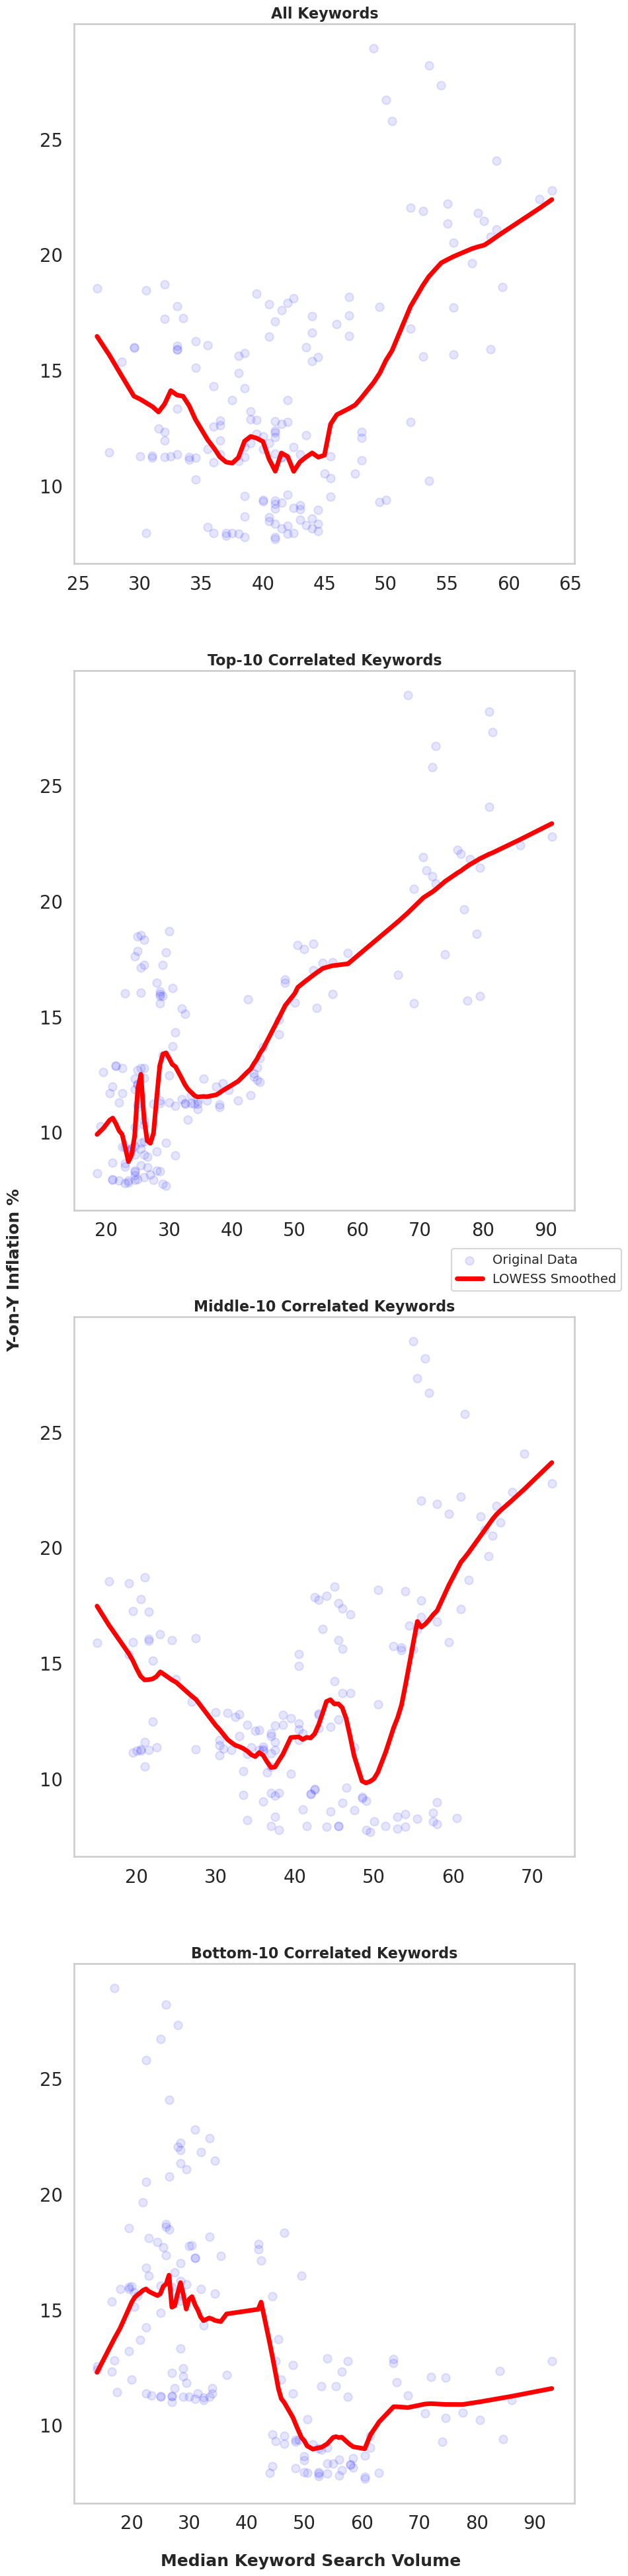

In [70]:
# Create figure with 4 subplots arranged vertically
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 40))

# Store lines for legend
lines1, lines2 = [], []

# Plot 1: All Keywords
x = reordered_trends_keywords_2011_2023_inflation.iloc[:, 1:-1].median(axis=1).to_numpy()
y = reordered_trends_keywords_2011_2023_inflation.iloc[:, [-1]].to_numpy().ravel()
smoothed = sml.nonparametric.lowess(endog=y, exog=x, frac=0.15)
scatter1 = ax1.scatter(x, y, alpha=0.1, color='blue')
line1, = ax1.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=5)
ax1.set_title('All Keywords', fontsize=16, weight='bold')
ax1.grid(False)
lines1.append(scatter1)
lines2.append(line1)

# Plot 2: Top 10 Keywords
x = reordered_trends_keywords_2011_2023_inflation.iloc[:, 1:11].median(axis=1).to_numpy()
y = reordered_trends_keywords_2011_2023_inflation.iloc[:, [-1]].to_numpy().ravel()
smoothed = sml.nonparametric.lowess(endog=y, exog=x, frac=0.15)
ax2.scatter(x, y, alpha=0.1, color='blue')
ax2.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=5)
ax2.set_title('Top-10 Correlated Keywords', fontsize=16, weight='bold')
ax2.grid(False)

# Plot 3: Middle 10 Keywords
mid_point = len(reordered_trends_keywords_2011_2023_inflation.columns[1:-1]) // 2
x = reordered_trends_keywords_2011_2023_inflation.iloc[:, mid_point-5:mid_point+5].median(axis=1).to_numpy()
y = reordered_trends_keywords_2011_2023_inflation.iloc[:, [-1]].to_numpy().ravel()
smoothed = sml.nonparametric.lowess(endog=y, exog=x, frac=0.15)
ax3.scatter(x, y, alpha=0.1, color='blue')
ax3.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=5)
ax3.set_title('Middle-10 Correlated Keywords', fontsize=16, weight='bold')
ax3.grid(False)

# Plot 4: Bottom 10 Keywords
x = reordered_trends_keywords_2011_2023_inflation.iloc[:, -11:-1].median(axis=1).to_numpy()
y = reordered_trends_keywords_2011_2023_inflation.iloc[:, [-1]].to_numpy().ravel()
smoothed = sml.nonparametric.lowess(endog=y, exog=x, frac=0.15)
ax4.scatter(x, y, alpha=0.1, color='blue')
ax4.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=5)
ax4.set_title('Bottom-10 Correlated Keywords', fontsize=16, weight='bold')
ax4.grid(False)

# Adjust layout and add common labels
plt.tight_layout(pad=3.0)
fig.text(0.04, 0.5, 'Y-on-Y Inflation %', va='center', rotation='vertical', fontsize=18, weight='bold')
fig.text(0.5, 0.01, 'Median Keyword Search Volume', ha='center', fontsize=18, weight='bold')

# Create a single central legend
legend_elements = [
    lines1[0],
    lines2[0]
]
fig.legend(legend_elements, 
          ['Original Data', 'LOWESS Smoothed'],
          loc='center right',
          bbox_to_anchor=(0.98, 0.5),
          fontsize=14)

# Save and show plot
plt.savefig('lowess_analysis_inflation_with_middle.png', dpi=300, bbox_inches='tight')
plt.show()

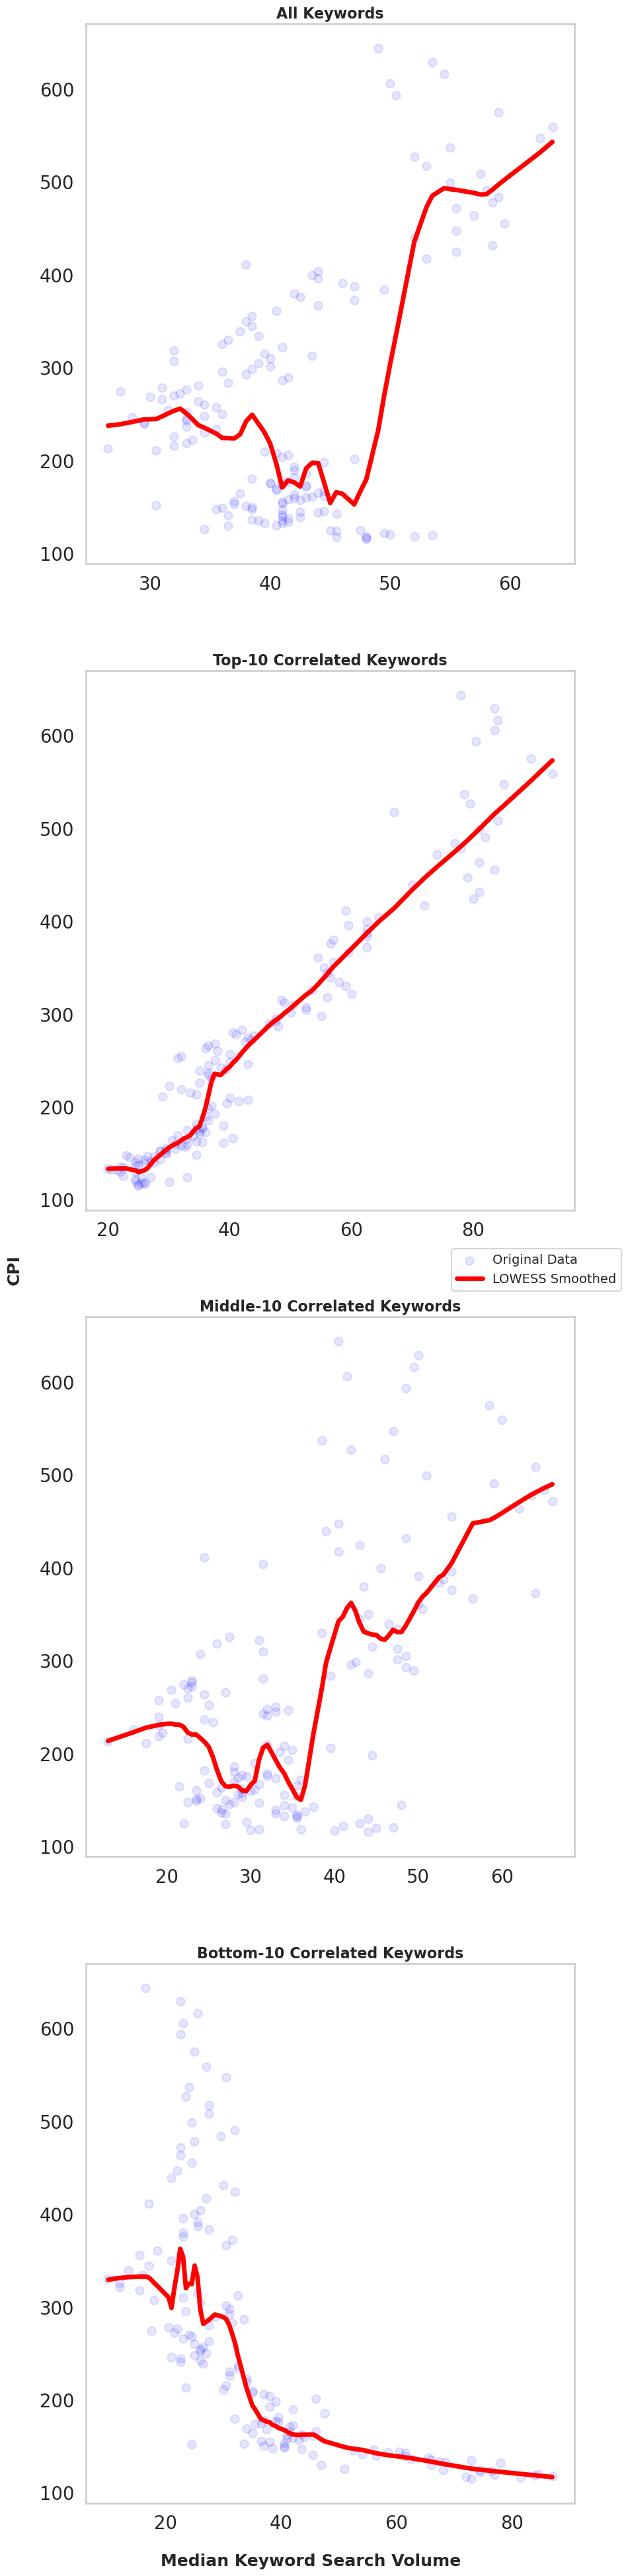

In [71]:
# Create figure with 4 subplots arranged vertically
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 40))

# Store lines for legend
lines1, lines2 = [], []

# Plot 1: All Keywords
x = reordered_trends_keywords_2011_2023_cpi.iloc[:, 1:-1].median(axis=1).to_numpy()
y = reordered_trends_keywords_2011_2023_cpi.iloc[:, [-1]].to_numpy().ravel()
smoothed = sml.nonparametric.lowess(endog=y, exog=x, frac=0.15)
scatter1 = ax1.scatter(x, y, alpha=0.1, color='blue')
line1, = ax1.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=5)
ax1.set_title('All Keywords', fontsize=16, weight='bold')
ax1.grid(False)
lines1.append(scatter1)
lines2.append(line1)

# Plot 2: Top 10 Keywords
x = reordered_trends_keywords_2011_2023_cpi.iloc[:, 1:11].median(axis=1).to_numpy()
y = reordered_trends_keywords_2011_2023_cpi.iloc[:, [-1]].to_numpy().ravel()
smoothed = sml.nonparametric.lowess(endog=y, exog=x, frac=0.15)
ax2.scatter(x, y, alpha=0.1, color='blue')
ax2.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=5)
ax2.set_title('Top-10 Correlated Keywords', fontsize=16, weight='bold')
ax2.grid(False)

# Plot 3: Middle 10 Keywords
mid_point = len(reordered_trends_keywords_2011_2023_cpi.columns[1:-1]) // 2
x = reordered_trends_keywords_2011_2023_cpi.iloc[:, mid_point-5:mid_point+5].median(axis=1).to_numpy()
y = reordered_trends_keywords_2011_2023_cpi.iloc[:, [-1]].to_numpy().ravel()
smoothed = sml.nonparametric.lowess(endog=y, exog=x, frac=0.15)
ax3.scatter(x, y, alpha=0.1, color='blue')
ax3.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=5)
ax3.set_title('Middle-10 Correlated Keywords', fontsize=16, weight='bold')
ax3.grid(False)

# Plot 4: Bottom 10 Keywords
x = reordered_trends_keywords_2011_2023_cpi.iloc[:, -11:-1].median(axis=1).to_numpy()
y = reordered_trends_keywords_2011_2023_cpi.iloc[:, [-1]].to_numpy().ravel()
smoothed = sml.nonparametric.lowess(endog=y, exog=x, frac=0.15)
ax4.scatter(x, y, alpha=0.1, color='blue')
ax4.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=5)
ax4.set_title('Bottom-10 Correlated Keywords', fontsize=16, weight='bold')
ax4.grid(False)

# Adjust layout and add common labels
plt.tight_layout(pad=3.0)
fig.text(0.04, 0.5, 'CPI', va='center', rotation='vertical', fontsize=18, weight='bold')
fig.text(0.5, 0.01, 'Median Keyword Search Volume', ha='center', fontsize=18, weight='bold')

# Create a single central legend
legend_elements = [
    lines1[0],
    lines2[0]
]
fig.legend(legend_elements, 
          ['Original Data', 'LOWESS Smoothed'],
          loc='center right',
          bbox_to_anchor=(0.98, 0.5),
          fontsize=14)

# Save and show plot
plt.savefig('lowess_analysis_cpi_with_middle.png', dpi=300, bbox_inches='tight')
plt.show()

In [143]:
# Convert string to datetime and then format
def format_date(date_str):
    date_obj = datetime.datetime.strptime(date_str, '%Y-%m')
    return date_obj.strftime('%b \'%y')

In [144]:
# get CPI and inflation % data 

ground_truth_aggregate_ratios = pd.read_csv('composite_aggregate_ratios.csv')
# ground_truth_aggregate_ratios.head()
yoy_inflation = ground_truth_aggregate_ratios[['Month', 'Year-on-Year Change (%)']]
yoy_inflation_till_2024 = yoy_inflation[(yoy_inflation['Month'] >= '2011-01') & (yoy_inflation['Month'] <= '2024-12')]
# Apply to your dataframe's Month column
yoy_inflation_till_2024['Month'] = yoy_inflation_till_2024['Month'].apply(format_date)
# reset index 
yoy_inflation_till_2024.reset_index(drop=True, inplace=True)
yoy_inflation_till_2024.tail()

/tmp/ipykernel_3060344/1358159887.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yoy_inflation_till_2024['Month'] = yoy_inflation_till_2024['Month'].apply(format_date)


,Month,Year-on-Year Change (%)
163,Aug '24,32.150132
164,Sep '24,32.696276
165,Oct '24,33.876872
166,Nov '24,34.598334
167,Dec '24,34.796057


In [155]:
# New 2025 Inflation Data in a dict

inflation_data_2025 = {
    'Month': ['Jan \'25', 'Feb \'25', 'Mar \'25'],
    'Year-on-Year Change (%)': [28.8714194402945, 27.9419467867661, 27.0183285193381]
}

# Convert to DataFrame
inflation_data_2025_df = pd.DataFrame(inflation_data_2025)

# Append to the existing DataFrame
yoy_inflation_till_March_2025 = pd.concat([yoy_inflation_till_2024, inflation_data_2025_df], ignore_index=True)

# save as csv
yoy_inflation_till_March_2025.to_csv('yoy_inflation_till_March_2025.csv', index=False)

display(yoy_inflation_till_March_2025)

,Month,Year-on-Year Change (%)
0,Jan '11,12.079665
1,Feb '11,11.099837
2,Mar '11,12.779128
3,Apr '11,11.291282
4,May '11,12.352128
...,...,...
166,Nov '24,34.598334
167,Dec '24,34.796057
168,Jan '25,28.871419
169,Feb '25,27.941947


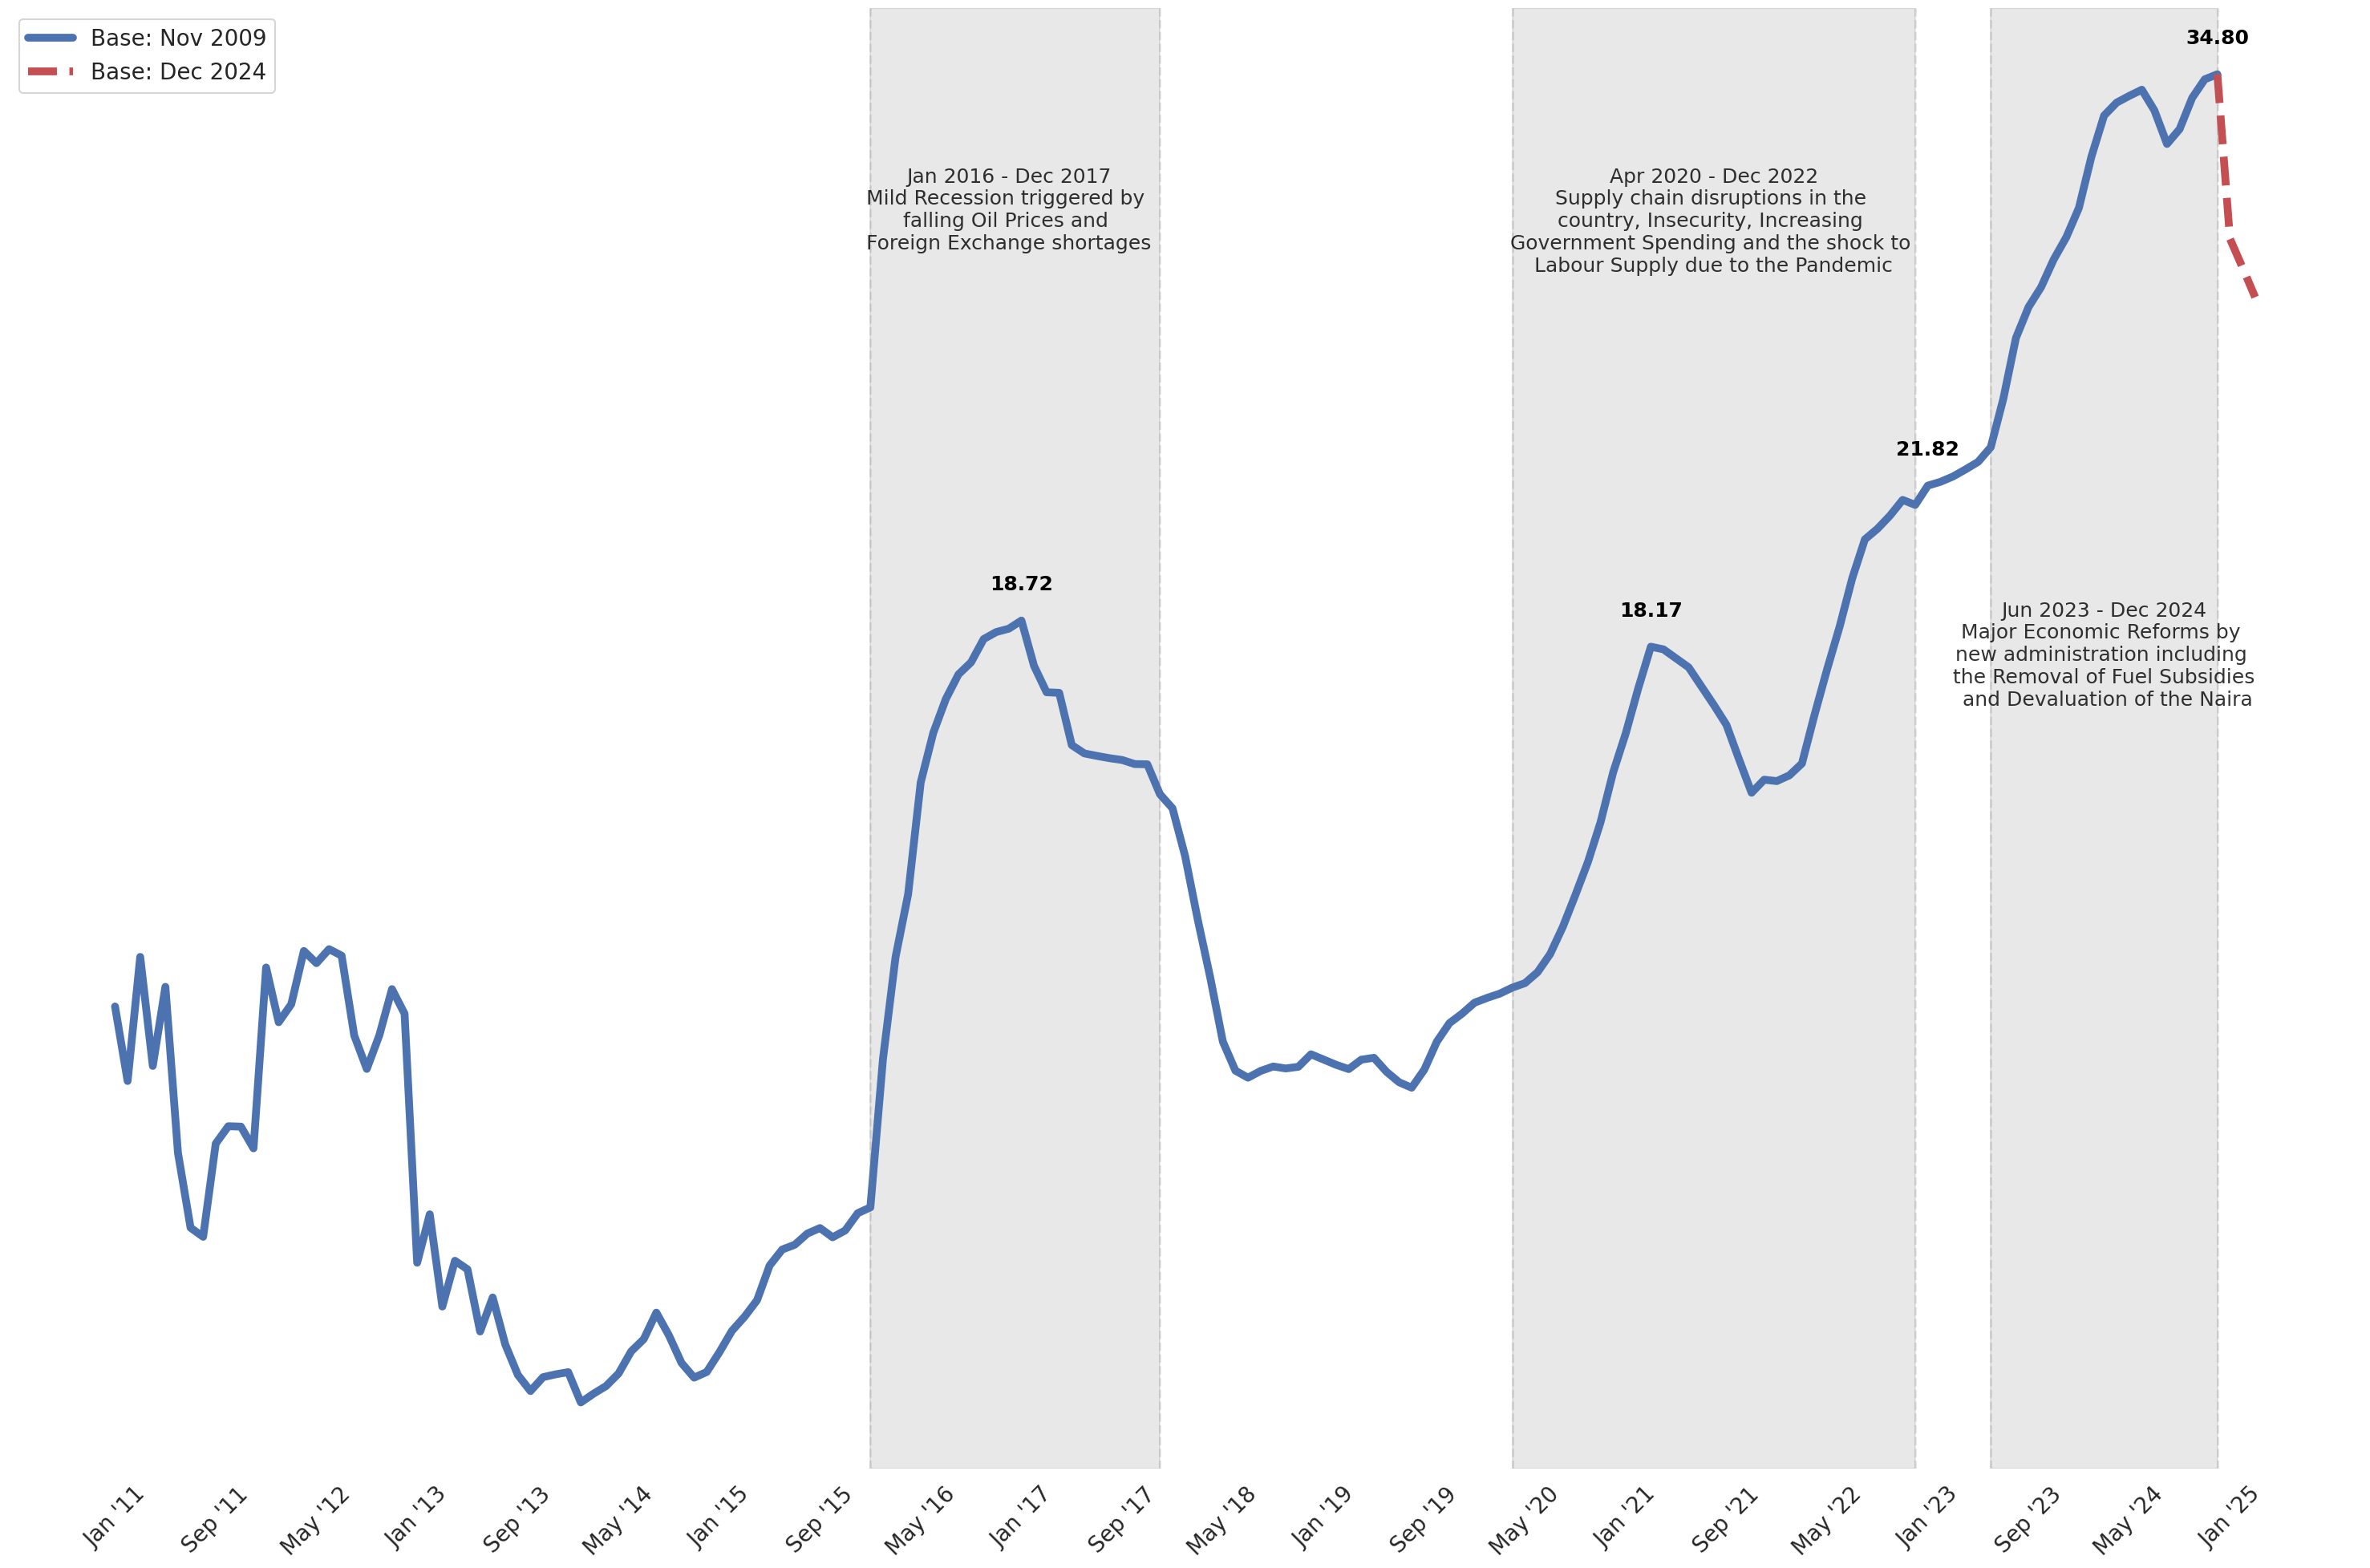

In [200]:
# Plot with seaborn, continuous line: blue up to Dec '24, red from Jan '25, with black marker at Dec '24

# inflation skipe ranges
highlight_ranges = [
                    ("Jan '16", "Dec '17", f"Jan 2016 - Dec 2017\nMild Recession triggered by \nfalling Oil Prices and \nForeign Exchange shortages", 0.90), 
                    ("Apr '20", "Dec '22", "Apr 2020 - Dec 2022\nSupply chain disruptions in the \ncountry, Insecurity, Increasing \nGovernment Spending and the shock to \nLabour Supply due to the Pandemic", 0.90), 
                    ("Jun '23", "Dec '24", f"Jun 2023 - Dec 2024\nMajor Economic Reforms by \nnew administration including \nthe Removal of Fuel Subsidies\n and Devaluation of the Naira", 0.55)
                ]

plt.figure(figsize=(30, 20))

# Get the index of Dec '24
dec24_idx = yoy_inflation_till_March_2025[yoy_inflation_till_March_2025['Month'] == "Dec '24"].index
if not dec24_idx.empty:
    dec24_idx = dec24_idx[0]
else:
    dec24_idx = len(yoy_inflation_till_March_2025) - 1  # fallback

# Plot blue line up to Dec '24 (inclusive)
plt.plot(
    yoy_inflation_till_March_2025['Month'][:dec24_idx+1],
    yoy_inflation_till_March_2025['Year-on-Year Change (%)'][:dec24_idx+1],
    color='b',
    linewidth=7,
    label='Base: Nov 2009'
)

# Plot red line from Jan '25 onwards (continuous)
plt.plot(
    yoy_inflation_till_March_2025['Month'][dec24_idx:],
    yoy_inflation_till_March_2025['Year-on-Year Change (%)'][dec24_idx:],
    color='r',
    linewidth=7,
    linestyle='--',
    label='Base: Dec 2024'
)

# Add a large black marker at Dec 2024
# plt.plot(
#     dec24_idx,
#     yoy_inflation_till_March_2025.loc[dec24_idx, 'Year-on-Year Change (%)'],
#     marker='o',
#     markersize=16,
#     color='k',
#     label='New Base Period'
# )

plt.yscale('log')
plt.gca().axes.get_yaxis().set_visible(False)

# remove all spines lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add vertical lines, shading, and explanatory text for each highlight range
y_max = max(yoy_inflation_till_March_2025['Year-on-Year Change (%)'])
for start, end, label, y_frac in highlight_ranges:
    months = list(yoy_inflation_till_March_2025['Month'])
    if start in months and end in months:
        start_idx = yoy_inflation_till_March_2025[yoy_inflation_till_March_2025['Month'] == start].index[0]
        end_idx = yoy_inflation_till_March_2025[yoy_inflation_till_March_2025['Month'] == end].index[0]
        # Draw vertical lines
        plt.axvline(x=start_idx, color='grey', linestyle='--', linewidth=2, alpha=0.2)
        plt.axvline(x=end_idx, color='grey', linestyle='--', linewidth=2, alpha=0.2)
        # Shade the region
        plt.axvspan(start_idx, end_idx, color='grey', alpha=0.18)
        # Add explanatory text at specified y location
        mid_idx = (start_idx + end_idx) // 2
        plt.text(
            mid_idx, y_max * y_frac, label,
            ha='center', va='top', fontsize=18, color='black', alpha=0.8, rotation=0
        )



# plt.title('Year-on-Year Inflation % (2011 - 2025)', fontsize=28, weight='bold')
# plt.xlabel('Month-Year', fontsize=22)
# plt.ylabel('Year-on-Year Change (%)', fontsize=22)

# Hide some x-tick labels and grid lines for cleanliness
xticklabels = yoy_inflation_till_March_2025['Month']
xticks = plt.xticks()[0]
hide_indices = np.arange(0, len(xticklabels), 8)
new_labels = [label if i in hide_indices else "" for i, label in enumerate(xticklabels)]
plt.xticks(ticks=xticks, labels=new_labels, rotation=45)

# Annotate values for these months
annotate_months = ["Jan '17", "Mar '21", "Jan '23", "Dec '24"]

for month in annotate_months:
    if month in list(yoy_inflation_till_March_2025['Month']):
        idx = yoy_inflation_till_March_2025[yoy_inflation_till_March_2025['Month'] == month].index[0]
        x = idx
        y = yoy_inflation_till_March_2025.loc[idx, 'Year-on-Year Change (%)']
        plt.text(
            x, y * 1.03,  # slightly above the point
            f"{y:.2f}",
            ha='center', va='bottom', fontsize=18, color='black', fontweight='bold'
        )

plt.grid(False)
plt.tight_layout()
plt.legend(fontsize=20)
plt.savefig('yoy_inflation_plot_seaborn_selective_xticks_continuous_colored.png', dpi=300, bbox_inches='tight')
plt.show()